# Society Score Prediction

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Checkout the data

In [2]:
societyData = pd.read_csv('data/Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv')

### Understanding the data

In [3]:
societyData[societyData['ENERGY STAR Score'] != 'Not Available']

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,...,Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,...,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
5,6,28402,NYP Cornell (East Campus),28402,NYP Cornell (East Campus),1014800001,1-01480-0001,1084781; 1084780,525 East 68th Street,Not Available,...,414.2,04/27/2017 11:23:27 AM,No,In Compliance,40.761395,-73.957726,8.0,5.0,116.0,Lenox Hill-Roosevelt Island ...
12,15,2637863,Cadman Towers,2637863,Cadman Towers,3002320001;3002380035,3002320001;3002380035,3001727;3319420,101 Clark St,aka 10 Clinton St,...,87.9,04/28/2017 04:07:55 PM,Yes,In Compliance,NaN,NaN,NaN,NaN,NaN,NaN
13,16,5871253,Cadman - 10 Clinton St,2637863,Cadman Towers,3002380035,3002380035,3319420,101 Clark St,aka 10 Clinton St,...,352.2,04/28/2017 04:07:55 PM,NaN,In Compliance,40.695835,-73.991673,2.0,33.0,502.0,Brooklyn Heights-Cobble Hill ...
14,17,2777235,STATEN ISLAND UNIVERSITY HOSPITAL Seaview,2777235,STATEN ISLAND UNIVERSITY HOSPITAL Seaview,5033550032;5033550065,5033550032;5-03355-0065,5049717;5104756,475 SEAVIEW AVE,Not Available,...,599.5,04/25/2017 12:11:30 PM,No,In Compliance,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11741,14988,4940453,Advanced: 24 Monroe Place,Not Applicable: Standalone Property,Not Applicable: Standalone Property,3002380026,3-00238-0026\t,3001927,24 Monroe Place,Not Available,...,109.6,04/26/2017 11:20:06 AM,NaN,NaN,40.696420,-73.992495,2.0,33.0,502.0,Brooklyn Heights-Cobble Hill ...
11742,14989,4940416,Advanced: 150 Joralemon St / 124 Clinton St,Not Applicable: Standalone Property,Not Applicable: Standalone Property,3002640017,3-00264-0017\t,3002539,150 Joralemon Street,Not Available,...,153.4,04/26/2017 11:20:06 AM,NaN,NaN,40.692602,-73.993231,2.0,33.0,7.0,Brooklyn Heights-Cobble Hill ...
11743,14990,4628296,(9267) - 267 Sixth St,Not Applicable: Standalone Property,Not Applicable: Standalone Property,3009870001​,3-00987-0001​,3413788; 3021326,267 6th Street,Not Available,...,103.6,03/23/2017 02:51:02 PM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11744,14991,4940464,Advanced: 27 Prospect Park West,Not Applicable: Standalone Property,Not Applicable: Standalone Property,3010720040,3-01072-0040\t,3024968;3824680,27 Prospect Park West,Not Available,...,92.7,04/26/2017 11:20:06 AM,NaN,NaN,40.670728,-73.971752,6.0,39.0,165.0,Park Slope-Gowanus ...


In [4]:
societyData.shape

(11746, 60)

#### The data contains 11746 rows and 60 features

In [5]:
societyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11746 non-null  int64  
 1   Property Id                                                 11746 non-null  int64  
 2   Property Name                                               11746 non-null  object 
 3   Parent Property Id                                          11746 non-null  object 
 4   Parent Property Name                                        11746 non-null  object 
 5   BBL - 10 digits                                             11735 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11746 non-null  object 
 7   NYC Building Identification Number (BIN)                    11746 non-null  object 
 

In [6]:
societyData.describe()

,Order,Property Id,DOF Gross Floor Area,Year Built,Number of Buildings - Self-reported,Occupancy,Property GFA - Self-Reported (ft²),Latitude,Longitude,Community Board,Council District,Census Tract
count,11746.000000,1.174600e+04,1.162800e+04,11746.000000,11746.000000,11746.000000,1.174600e+04,9483.000000,9483.000000,9483.000000,9483.000000,9483.000000
mean,7185.759578,3.642958e+06,1.732695e+05,1948.738379,1.289971,98.762557,1.673739e+05,40.754379,-73.957057,7.140673,15.771275,4977.596647
std,4323.859984,1.049070e+06,3.367055e+05,30.576386,4.017484,7.501603,3.189238e+05,0.080120,0.046337,3.954129,15.674375,13520.422990
min,1.000000,7.365000e+03,5.002800e+04,1600.000000,0.000000,0.000000,0.000000e+00,40.516065,-74.243582,1.000000,1.000000,1.000000
25%,3428.250000,2.747222e+06,6.524000e+04,1927.000000,1.000000,100.000000,6.699400e+04,40.707226,-73.984662,4.000000,4.000000,100.000000
50%,6986.500000,3.236404e+06,9.313850e+04,1941.000000,1.000000,100.000000,9.408000e+04,40.759130,-73.962810,7.000000,9.000000,201.000000
75%,11054.500000,4.409092e+06,1.596140e+05,1966.000000,1.000000,100.000000,1.584140e+05,40.817623,-73.932443,9.000000,33.000000,531.500000
max,14993.000000,5.991312e+06,1.354011e+07,2019.000000,161.000000,100.000000,1.421712e+07,40.912869,-73.715543,56.000000,51.000000,155101.000000


In [7]:
societyData.nunique()

Order                                                         11746
Property Id                                                   11746
Property Name                                                 11740
Parent Property Id                                              102
Parent Property Name                                            103
BBL - 10 digits                                               11580
NYC Borough, Block and Lot (BBL) self-reported                11582
NYC Building Identification Number (BIN)                      11508
Address 1 (self-reported)                                     11645
Address 2                                                       177
Postal Code                                                     286
Street Number                                                  4198
Street Name                                                    2024
Borough                                                           5
DOF Gross Floor Area                            

In [8]:
societyData[societyData['ENERGY STAR Score'] != 'Not Available']['ENERGY STAR Score'].unique()

array(['55', '93', '1', '80', '72', '67', '100', '40', '99', '12', '88',
       '89', '86', '73', '71', '74', '19', '84', '78', '81', '6', '77',
       '3', '59', '23', '61', '58', '85', '66', '45', '2', '51', '17',
       '34', '22', '43', '13', '96', '98', '36', '69', '68', '65', '26',
       '95', '49', '39', '29', '14', '15', '16', '53', '94', '8', '33',
       '32', '91', '25', '24', '11', '21', '30', '42', '41', '79', '97',
       '35', '90', '28', '37', '31', '4', '75', '64', '9', '92', '62',
       '38', '76', '20', '54', '87', '70', '46', '56', '63', '48', '10',
       '60', '82', '44', '83', '52', '18', '7', '5', '27', '57', '47',
       '50'], dtype=object)

### EDA

#### Removing Order, Property Id, Latitude and Longitude from columns

In [9]:
societyData = societyData[['Property Name', 'Parent Property Id',
       'Parent Property Name', 'BBL - 10 digits',
       'NYC Borough, Block and Lot (BBL) self-reported',
       'NYC Building Identification Number (BIN)', 'Address 1 (self-reported)',
       'Address 2', 'Postal Code', 'Street Number', 'Street Name', 'Borough',
       'DOF Gross Floor Area', 'Primary Property Type - Self Selected',
       'List of All Property Use Types at Property',
       'Largest Property Use Type',
       'Largest Property Use Type - Gross Floor Area (ft²)',
       '2nd Largest Property Use Type',
       '2nd Largest Property Use - Gross Floor Area (ft²)',
       '3rd Largest Property Use Type',
       '3rd Largest Property Use Type - Gross Floor Area (ft²)', 'Year Built',
       'Number of Buildings - Self-reported', 'Occupancy',
       'Metered Areas (Energy)', 'Metered Areas  (Water)', 'ENERGY STAR Score',
       'Site EUI (kBtu/ft²)', 'Weather Normalized Site EUI (kBtu/ft²)',
       'Weather Normalized Site Electricity Intensity (kWh/ft²)',
       'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
       'Weather Normalized Source EUI (kBtu/ft²)', 'Fuel Oil #1 Use (kBtu)',
       'Fuel Oil #2 Use (kBtu)', 'Fuel Oil #4 Use (kBtu)',
       'Fuel Oil #5 & 6 Use (kBtu)', 'Diesel #2 Use (kBtu)',
       'District Steam Use (kBtu)', 'Natural Gas Use (kBtu)',
       'Weather Normalized Site Natural Gas Use (therms)',
       'Electricity Use - Grid Purchase (kBtu)',
       'Weather Normalized Site Electricity (kWh)',
       'Total GHG Emissions (Metric Tons CO2e)',
       'Direct GHG Emissions (Metric Tons CO2e)',
       'Indirect GHG Emissions (Metric Tons CO2e)',
       'Property GFA - Self-Reported (ft²)',
       'Water Use (All Water Sources) (kgal)',
       'Water Intensity (All Water Sources) (gal/ft²)',
       'Source EUI (kBtu/ft²)', 'Release Date', 'Water Required?',
       'DOF Benchmarking Submission Status',
       'Community Board', 'Council District', 'Census Tract', 'NTA']]

#### Converting ENERGY STAR Score to float data type and dropping rows with nan values of target variable

In [10]:
societyData['ENERGY STAR Score'] = societyData['ENERGY STAR Score'].replace('Not Available', np.nan)
societyData = societyData.dropna(subset=['ENERGY STAR Score'])

In [11]:
societyData.shape

(9642, 56)

In [12]:
societyData['ENERGY STAR Score'] = societyData['ENERGY STAR Score'].astype(float)

In [13]:
societyData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9642 entries, 1 to 11745
Data columns (total 56 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Property Name                                               9642 non-null   object 
 1   Parent Property Id                                          9642 non-null   object 
 2   Parent Property Name                                        9642 non-null   object 
 3   BBL - 10 digits                                             9640 non-null   object 
 4   NYC Borough, Block and Lot (BBL) self-reported              9642 non-null   object 
 5   NYC Building Identification Number (BIN)                    9642 non-null   object 
 6   Address 1 (self-reported)                                   9642 non-null   object 
 7   Address 2                                                   9642 non-null   object 
 8

In [14]:
societyData['ENERGY STAR Score']

1        55.0
5        55.0
12       93.0
13        1.0
14       80.0
         ... 
11741    98.0
11742    16.0
11743    83.0
11744    92.0
11745    19.0
Name: ENERGY STAR Score, Length: 9642, dtype: float64

C:\Users\rohan.chittora\AppData\Local\Temp\ipykernel_23388\2778660535.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(societyData.corr())


<Axes: >

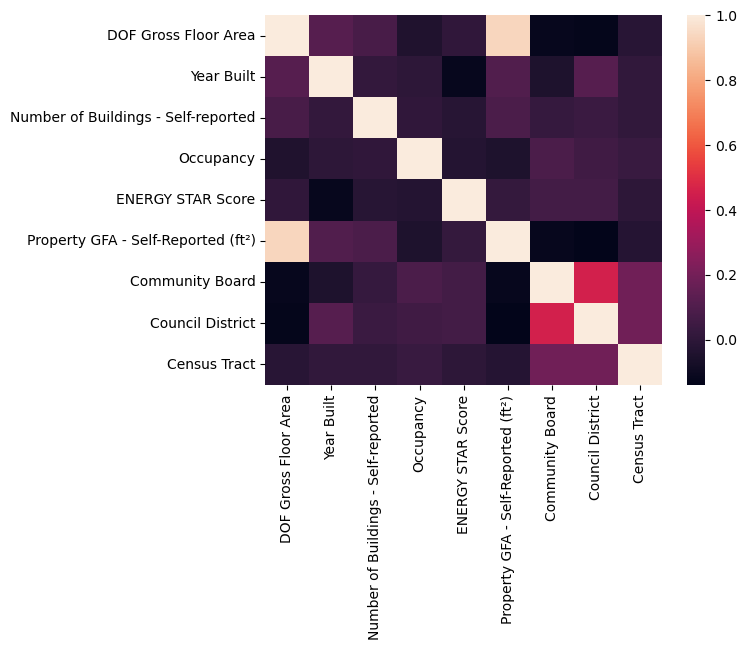

In [15]:
sns.heatmap(societyData.corr())

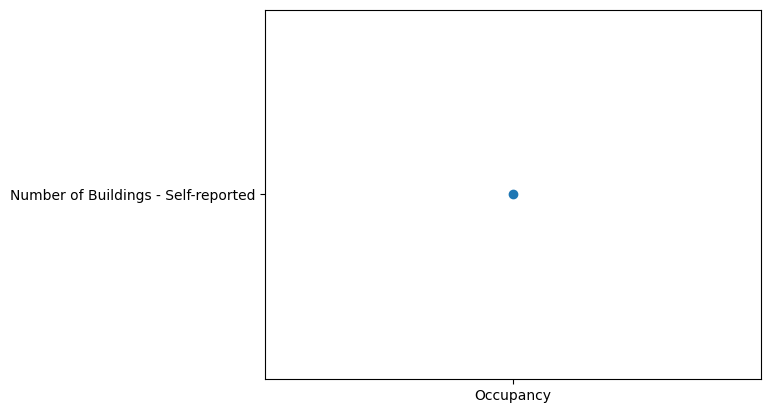

In [16]:
plt.scatter('Occupancy', 'Number of Buildings - Self-reported')
plt.show()

In [17]:
societyData['Number of Buildings - Self-reported']

1        12
5        12
12        2
13        1
14        2
         ..
11741     1
11742     1
11743     1
11744     1
11745     1
Name: Number of Buildings - Self-reported, Length: 9642, dtype: int64

<Axes: >

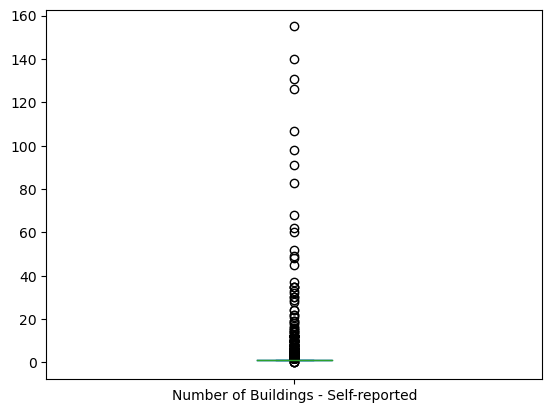

In [18]:
societyData['Number of Buildings - Self-reported'].plot(kind = 'box')

<Axes: >

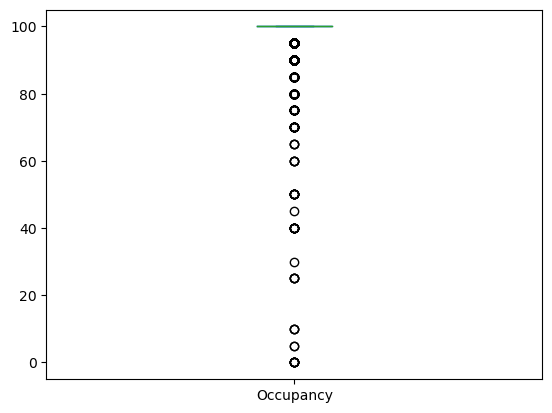

In [19]:
societyData['Occupancy'].plot(kind = 'box')

In [20]:
societyData.nunique()

Property Name                                                 9638
Parent Property Id                                              82
Parent Property Name                                            82
BBL - 10 digits                                               9567
NYC Borough, Block and Lot (BBL) self-reported                9568
NYC Building Identification Number (BIN)                      9468
Address 1 (self-reported)                                     9584
Address 2                                                      126
Postal Code                                                    266
Street Number                                                 3772
Street Name                                                   1872
Borough                                                          5
DOF Gross Floor Area                                          7783
Primary Property Type - Self Selected                           25
List of All Property Use Types at Property                    

#### There is very low correlation between target variable and numerical features from the above heatmap

C:\Users\rohan.chittora\AppData\Local\Temp\ipykernel_23388\2358258471.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(societyData['ENERGY STAR Score'])


<Axes: xlabel='ENERGY STAR Score', ylabel='Density'>

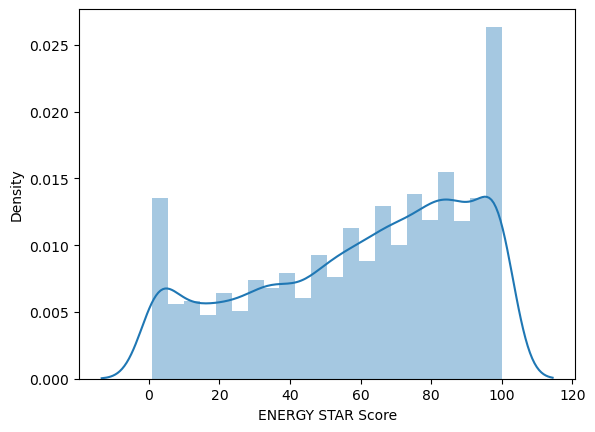

In [21]:
sns.distplot(societyData['ENERGY STAR Score'])

<Axes: >

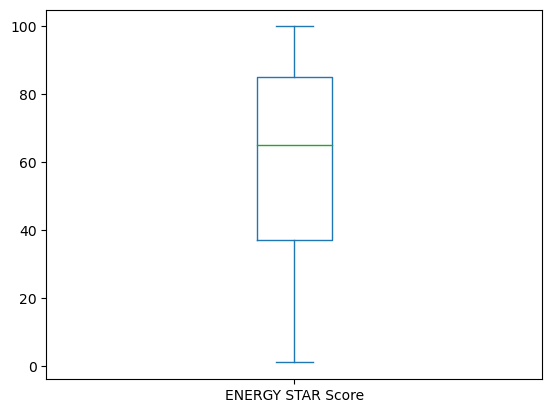

In [22]:
societyData['ENERGY STAR Score'].plot(kind = 'box')

### Pre Processing

#### Handling missing data

In [23]:
societyData.isnull().sum()

Property Name                                                    0
Parent Property Id                                               0
Parent Property Name                                             0
BBL - 10 digits                                                  2
NYC Borough, Block and Lot (BBL) self-reported                   0
NYC Building Identification Number (BIN)                         0
Address 1 (self-reported)                                        0
Address 2                                                        0
Postal Code                                                      0
Street Number                                                   68
Street Name                                                     66
Borough                                                         63
DOF Gross Floor Area                                            63
Primary Property Type - Self Selected                            0
List of All Property Use Types at Property                    

In [24]:
societyData['Primary Property Type - Self Selected'].unique()

array(['Hospital (General Medical & Surgical)', 'Multifamily Housing',
       'Office', 'Residence Hall/Dormitory', 'Medical Office',
       'Senior Care Community', 'Bank Branch', 'K-12 School',
       'Retail Store', 'College/University', 'Other', 'Hotel',
       'Financial Office', 'Non-Refrigerated Warehouse',
       'Worship Facility', 'Distribution Center',
       'Fitness Center/Health Club/Gym', 'Mixed Use Property',
       'Self-Storage Facility', 'Supermarket/Grocery Store', 'Courthouse',
       'Wholesale Club/Supercenter', 'Refrigerated Warehouse',
       'Manufacturing/Industrial Plant', 'Residential Care Facility'],
      dtype=object)

In [25]:
print("num of unique values for 'Occupancy':", societyData['Occupancy'].nunique())
print("distinct unique values for 'Occupancy':", societyData['Occupancy'].unique())

num of unique values for 'Occupancy': 17
distinct unique values for 'Occupancy': [100  95  75  80  50  40  70  90  85  60  25   0   5  65  10  30  45]


In [26]:
print("num of unique values for 'List of All Property Use Types at Property':", societyData['List of All Property Use Types at Property'].nunique())
print("distinct unique values for 'List of All Property Use Types at Property':", societyData['List of All Property Use Types at Property'].unique())

num of unique values for 'List of All Property Use Types at Property': 494
distinct unique values for 'List of All Property Use Types at Property': ['Hospital (General Medical & Surgical)'
 'Multifamily Housing, Other, Parking'
 'Multifamily Housing, Parking, Retail Store' 'Multifamily Housing'
 'Office' 'Residence Hall/Dormitory' 'Office, Other'
 'Office, Other, Residence Hall/Dormitory'
 'Office, Residence Hall/Dormitory' 'Medical Office, Office, Other'
 'Multifamily Housing, Parking'
 'College/University, Residence Hall/Dormitory'
 'Hospital (General Medical & Surgical), Other' 'Medical Office'
 'Office, Residence Hall/Dormitory, Retail Store' 'Senior Care Community'
 'Bank Branch' 'Multifamily Housing, Other'
 'K-12 School, Parking, Swimming Pool' 'Retail Store'
 'Medical Office, Office' 'K-12 School' 'Multifamily Housing, Office'
 'Data Center, Office, Parking' 'Office, Pre-school/Daycare'
 'Office, Parking' 'Office, Retail Store'
 'Convenience Store without Gas Station, Office'
 

In [27]:
print("num of unique values for 'Largest Property Use Type':", societyData['Largest Property Use Type'].nunique())
print("distinct unique values for 'Largest Property Use Type':", societyData['Largest Property Use Type'].unique())

num of unique values for 'Largest Property Use Type': 19
distinct unique values for 'Largest Property Use Type': ['Hospital (General Medical & Surgical)' 'Multifamily Housing' 'Office'
 'Residence Hall/Dormitory' 'Medical Office' 'Senior Care Community'
 'Bank Branch' 'K-12 School' 'Retail Store' 'Hotel' 'Financial Office'
 'Non-Refrigerated Warehouse' 'Worship Facility' 'Distribution Center'
 'Parking' 'Supermarket/Grocery Store' 'Courthouse'
 'Wholesale Club/Supercenter' 'Refrigerated Warehouse']


In [28]:
print("num of unique values for 'Largest Property Use Type - Gross Floor Area (ft²)':", societyData['Largest Property Use Type - Gross Floor Area (ft²)'].nunique())
print("distinct unique values for 'Largest Property Use Type - Gross Floor Area (ft²)':", societyData['Largest Property Use Type - Gross Floor Area (ft²)'].unique())

num of unique values for 'Largest Property Use Type - Gross Floor Area (ft²)': 7863
distinct unique values for 'Largest Property Use Type - Gross Floor Area (ft²)': ['3889181' '2971874' '412503' ... '74177' '103328' '60715']


In [29]:
print("num of unique values for '2nd Largest Property Use Type':", societyData['2nd Largest Property Use Type'].nunique())
print("distinct unique values for '2nd Largest Property Use Type':", societyData['2nd Largest Property Use Type'].unique())

num of unique values for '2nd Largest Property Use Type': 54
distinct unique values for '2nd Largest Property Use Type': ['Not Available' 'Other' 'Parking' 'Residence Hall/Dormitory' 'Office'
 'College/University' 'Retail Store' 'Medical Office' 'Data Center'
 'Pre-school/Daycare' 'Convenience Store without Gas Station'
 'K-12 School' 'Multifamily Housing' 'Financial Office'
 'Senior Care Community' 'Other - Entertainment/Public Assembly'
 'Bank Branch' 'Restaurant' 'Other - Public Services' 'Hotel'
 'Other - Restaurant/Bar' 'Food Service' 'Supermarket/Grocery Store'
 'Enclosed Mall' 'Personal Services (Health/Beauty, Dry Cleaning, etc.)'
 'Non-Refrigerated Warehouse' 'Fitness Center/Health Club/Gym'
 'Swimming Pool' 'Other - Recreation' 'Other - Utility'
 'Automobile Dealership' 'Laboratory' 'Fast Food Restaurant' 'Food Sales'
 'Other - Education' 'Urgent Care/Clinic/Other Outpatient'
 'Vocational School' 'Adult Education' 'Manufacturing/Industrial Plant'
 'Bar/Nightclub' 'Distributio

In [30]:
societyData['2nd Largest Property Use Type'] = societyData['2nd Largest Property Use Type'].replace('Not Available', np.nan)
print("num of unique values for '2nd Largest Property Use Type':", societyData['2nd Largest Property Use Type'].nunique())
print("distinct unique values for '2nd Largest Property Use Type':", societyData['2nd Largest Property Use Type'].unique())

num of unique values for '2nd Largest Property Use Type': 53
distinct unique values for '2nd Largest Property Use Type': [nan 'Other' 'Parking' 'Residence Hall/Dormitory' 'Office'
 'College/University' 'Retail Store' 'Medical Office' 'Data Center'
 'Pre-school/Daycare' 'Convenience Store without Gas Station'
 'K-12 School' 'Multifamily Housing' 'Financial Office'
 'Senior Care Community' 'Other - Entertainment/Public Assembly'
 'Bank Branch' 'Restaurant' 'Other - Public Services' 'Hotel'
 'Other - Restaurant/Bar' 'Food Service' 'Supermarket/Grocery Store'
 'Enclosed Mall' 'Personal Services (Health/Beauty, Dry Cleaning, etc.)'
 'Non-Refrigerated Warehouse' 'Fitness Center/Health Club/Gym'
 'Swimming Pool' 'Other - Recreation' 'Other - Utility'
 'Automobile Dealership' 'Laboratory' 'Fast Food Restaurant' 'Food Sales'
 'Other - Education' 'Urgent Care/Clinic/Other Outpatient'
 'Vocational School' 'Adult Education' 'Manufacturing/Industrial Plant'
 'Bar/Nightclub' 'Distribution Center' 'O

In [31]:
print("num of unique values for '2nd Largest Property Use - Gross Floor Area (ft²)':", societyData['2nd Largest Property Use - Gross Floor Area (ft²)'].nunique())
print("distinct unique values for '2nd Largest Property Use - Gross Floor Area (ft²)':", societyData['2nd Largest Property Use - Gross Floor Area (ft²)'].unique())

num of unique values for '2nd Largest Property Use - Gross Floor Area (ft²)': 1509
distinct unique values for '2nd Largest Property Use - Gross Floor Area (ft²)': ['Not Available' '20000' '40000' ... '33200' '14584' '7791']


In [32]:
societyData['2nd Largest Property Use - Gross Floor Area (ft²)'] = societyData['2nd Largest Property Use - Gross Floor Area (ft²)'].replace('Not Available', np.nan)
print("num of unique values for '2nd Largest Property Use - Gross Floor Area (ft²)':", societyData['2nd Largest Property Use - Gross Floor Area (ft²)'].nunique())
print("distinct unique values for '2nd Largest Property Use - Gross Floor Area (ft²)':", societyData['2nd Largest Property Use - Gross Floor Area (ft²)'].unique())

num of unique values for '2nd Largest Property Use - Gross Floor Area (ft²)': 1508
distinct unique values for '2nd Largest Property Use - Gross Floor Area (ft²)': [nan '20000' '40000' ... '33200' '14584' '7791']


In [33]:
print("num of unique values for '3rd Largest Property Use Type':", societyData['3rd Largest Property Use Type'].nunique())
print("distinct unique values for '3rd Largest Property Use Type':", societyData['3rd Largest Property Use Type'].unique())

num of unique values for '3rd Largest Property Use Type': 44
distinct unique values for '3rd Largest Property Use Type': ['Not Available' 'Parking' 'Retail Store' 'Other' 'Office' 'Swimming Pool'
 'Data Center' 'Restaurant' 'Other - Recreation'
 'Repair Services (Vehicle, Shoe, Locksmith, etc.)' 'Fast Food Restaurant'
 'Bank Branch' 'Supermarket/Grocery Store' 'Hotel' 'Self-Storage Facility'
 'Food Service' 'Other - Restaurant/Bar' 'Medical Office' 'Museum'
 'Other - Mall' 'K-12 School'
 'Personal Services (Health/Beauty, Dry Cleaning, etc.)'
 'Financial Office' 'Urgent Care/Clinic/Other Outpatient'
 'Adult Education' 'Food Sales' 'Other - Services'
 'Other - Entertainment/Public Assembly' 'Other - Public Services'
 'Social/Meeting Hall' 'Outpatient Rehabilitation/Physical Therapy'
 'Other - Education' 'Other - Lodging/Residential'
 'Fitness Center/Health Club/Gym' 'Bowling Alley' 'Pre-school/Daycare'
 'Mailing Center/Post Office' 'Wholesale Club/Supercenter' 'Library'
 'Ambulatory Sur

In [34]:
societyData['3rd Largest Property Use Type'] = societyData['3rd Largest Property Use Type'].replace('Not Available', np.nan)
print("num of unique values for '3rd Largest Property Use Type':", societyData['3rd Largest Property Use Type'].nunique())
print("distinct unique values for '3rd Largest Property Use Type':", societyData['3rd Largest Property Use Type'].unique())

num of unique values for '3rd Largest Property Use Type': 43
distinct unique values for '3rd Largest Property Use Type': [nan 'Parking' 'Retail Store' 'Other' 'Office' 'Swimming Pool'
 'Data Center' 'Restaurant' 'Other - Recreation'
 'Repair Services (Vehicle, Shoe, Locksmith, etc.)' 'Fast Food Restaurant'
 'Bank Branch' 'Supermarket/Grocery Store' 'Hotel' 'Self-Storage Facility'
 'Food Service' 'Other - Restaurant/Bar' 'Medical Office' 'Museum'
 'Other - Mall' 'K-12 School'
 'Personal Services (Health/Beauty, Dry Cleaning, etc.)'
 'Financial Office' 'Urgent Care/Clinic/Other Outpatient'
 'Adult Education' 'Food Sales' 'Other - Services'
 'Other - Entertainment/Public Assembly' 'Other - Public Services'
 'Social/Meeting Hall' 'Outpatient Rehabilitation/Physical Therapy'
 'Other - Education' 'Other - Lodging/Residential'
 'Fitness Center/Health Club/Gym' 'Bowling Alley' 'Pre-school/Daycare'
 'Mailing Center/Post Office' 'Wholesale Club/Supercenter' 'Library'
 'Ambulatory Surgical Center

In [35]:
societyData[societyData.columns]=societyData[societyData.columns].replace('Not Available', np.nan)

In [36]:
societyData

,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,...,Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Community Board,Council District,Census Tract,NTA
1,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,NaN,10032,180,...,NaN,NaN,404.3,04/27/2017 11:23:27 AM,No,In Compliance,12.0,10.0,251.0,Washington Heights South ...
5,NYP Cornell (East Campus),28402,NYP Cornell (East Campus),1014800001,1-01480-0001,1084781; 1084780,525 East 68th Street,NaN,10021,1176,...,NaN,NaN,414.2,04/27/2017 11:23:27 AM,No,In Compliance,8.0,5.0,116.0,Lenox Hill-Roosevelt Island ...
12,Cadman Towers,2637863,Cadman Towers,3002320001;3002380035,3002320001;3002380035,3001727;3319420,101 Clark St,aka 10 Clinton St,11201,NaN,...,22061,51.01,87.9,04/28/2017 04:07:55 PM,Yes,In Compliance,NaN,NaN,NaN,NaN
13,Cadman - 10 Clinton St,2637863,Cadman Towers,3002380035,3002380035,3319420,101 Clark St,aka 10 Clinton St,11201,10,...,NaN,NaN,352.2,04/28/2017 04:07:55 PM,NaN,In Compliance,2.0,33.0,502.0,Brooklyn Heights-Cobble Hill ...
14,STATEN ISLAND UNIVERSITY HOSPITAL Seaview,2777235,STATEN ISLAND UNIVERSITY HOSPITAL Seaview,5033550032;5033550065,5033550032;5-03355-0065,5049717;5104756,475 SEAVIEW AVE,NaN,10305,NaN,...,9574,16.87,599.5,04/25/2017 12:11:30 PM,No,In Compliance,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11741,Advanced: 24 Monroe Place,Not Applicable: Standalone Property,Not Applicable: Standalone Property,3002380026,3-00238-0026\t,3001927,24 Monroe Place,NaN,11218,22,...,2308.5,31.12,109.6,04/26/2017 11:20:06 AM,NaN,NaN,2.0,33.0,502.0,Brooklyn Heights-Cobble Hill ...
11742,Advanced: 150 Joralemon St / 124 Clinton St,Not Applicable: Standalone Property,Not Applicable: Standalone Property,3002640017,3-00264-0017\t,3002539,150 Joralemon Street,NaN,11201,130,...,4216.8,41.63,153.4,04/26/2017 11:20:06 AM,NaN,NaN,2.0,33.0,7.0,Brooklyn Heights-Cobble Hill ...
11743,(9267) - 267 Sixth St,Not Applicable: Standalone Property,Not Applicable: Standalone Property,3009870001​,3-00987-0001​,3413788; 3021326,267 6th Street,NaN,11215,NaN,...,NaN,NaN,103.6,03/23/2017 02:51:02 PM,NaN,NaN,NaN,NaN,NaN,NaN
11744,Advanced: 27 Prospect Park West,Not Applicable: Standalone Property,Not Applicable: Standalone Property,3010720040,3-01072-0040\t,3024968;3824680,27 Prospect Park West,NaN,11215,27,...,1687.6,27.8,92.7,04/26/2017 11:20:06 AM,NaN,NaN,6.0,39.0,165.0,Park Slope-Gowanus ...


#### Converted Not Available values to NaN and calculating num of missing values in the data

In [37]:
societyData.isna().sum()

Property Name                                                    0
Parent Property Id                                               0
Parent Property Name                                             0
BBL - 10 digits                                                  2
NYC Borough, Block and Lot (BBL) self-reported                   2
NYC Building Identification Number (BIN)                       132
Address 1 (self-reported)                                        0
Address 2                                                     9489
Postal Code                                                      0
Street Number                                                   68
Street Name                                                     66
Borough                                                         63
DOF Gross Floor Area                                            63
Primary Property Type - Self Selected                            0
List of All Property Use Types at Property                    

#### Calculating missing percentage for each column

In [38]:
missing_per=societyData.isnull().sum()/len(societyData) * 100
print("missing percentage of each column is:\n\n", missing_per)

missing percentage of each column is:

 Property Name                                                  0.000000
Parent Property Id                                             0.000000
Parent Property Name                                           0.000000
BBL - 10 digits                                                0.020743
NYC Borough, Block and Lot (BBL) self-reported                 0.020743
NYC Building Identification Number (BIN)                       1.369011
Address 1 (self-reported)                                      0.000000
Address 2                                                     98.413192
Postal Code                                                    0.000000
Street Number                                                  0.705248
Street Name                                                    0.684505
Borough                                                        0.653391
DOF Gross Floor Area                                           0.653391
Primary Property Type - 

#### converting release date and year built to int

In [39]:
societyData['Release Date'] = pd.to_datetime(societyData['Release Date'], format='%m/%d/%Y %I:%M:%S %p')
societyData['Release Date'] = (societyData['Release Date'] - pd.to_datetime(pd.datetime.today())).dt.days
societyData['Release Date'] = -1* societyData['Release Date']

C:\Users\rohan.chittora\AppData\Local\Temp\ipykernel_23388\3409740413.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  societyData['Release Date'] = (societyData['Release Date'] - pd.to_datetime(pd.datetime.today())).dt.days


In [40]:
societyData['Year Built'] = pd.datetime.now().year - societyData['Year Built'] 

C:\Users\rohan.chittora\AppData\Local\Temp\ipykernel_23388\3818921025.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  societyData['Year Built'] = pd.datetime.now().year - societyData['Year Built']


#### check value counts of each unique values for categorical data

In [41]:
val_count_cat_col = ['Borough',
                    'Largest Property Use Type', 'NTA']


def check_value_count_for_categorical_data(column):
    print("value_count for #" ,column, "#:\n", societyData[column].value_counts(), "\n\n-------------------------------------\n\n" )

In [42]:
for col in val_count_cat_col:
    check_value_count_for_categorical_data(col)

value_count for # Borough #:
 Manhattan        4057
Brooklyn         1973
Queens           1746
Bronx            1677
Staten Island     126
Name: Borough, dtype: int64 

-------------------------------------


value_count for # Largest Property Use Type #:
 Multifamily Housing                      7529
Office                                   1193
Hotel                                     215
Non-Refrigerated Warehouse                159
K-12 School                                98
Residence Hall/Dormitory                   97
Senior Care Community                      92
Retail Store                               64
Distribution Center                        62
Hospital (General Medical & Surgical)      41
Medical Office                             29
Supermarket/Grocery Store                  19
Financial Office                           15
Worship Facility                            9
Refrigerated Warehouse                      9
Wholesale Club/Supercenter                  4
Parkin

#### Shifting values with very low value counts to 'Other' for 'Largest Property Use Type' and 'NTA'


In [43]:
cond = societyData['NTA'].value_counts()
threshold = 50
societyData['NTA'] = np.where(societyData['NTA'].isin(cond.index[cond >= threshold ]), societyData['NTA'], 'Other')

In [44]:
cond = societyData['Largest Property Use Type'].value_counts()
threshold = 50
societyData['Largest Property Use Type'] = np.where(societyData['Largest Property Use Type'].isin(cond.index[cond >= threshold ]), societyData['Largest Property Use Type'], 'Other')

In [45]:
for col in val_count_cat_col:
    check_value_count_for_categorical_data(col)

value_count for # Borough #:
 Manhattan        4057
Brooklyn         1973
Queens           1746
Bronx            1677
Staten Island     126
Name: Borough, dtype: int64 

-------------------------------------


value_count for # Largest Property Use Type #:
 Multifamily Housing           7529
Office                        1193
Hotel                          215
Non-Refrigerated Warehouse     159
Other                          133
K-12 School                     98
Residence Hall/Dormitory        97
Senior Care Community           92
Retail Store                    64
Distribution Center             62
Name: Largest Property Use Type, dtype: int64 

-------------------------------------


value_count for # NTA #:
 Other                                                                          3468
Midtown-Midtown South                                                           617
Upper West Side                                                                 374
Hudson Yards-Chelsea-Flati

####  handling outliers

In [46]:
feature_col = ['DOF Gross Floor Area',
       'Largest Property Use Type - Gross Floor Area (ft²)', 'Year Built',
       'ENERGY STAR Score',
       'Site EUI (kBtu/ft²)', 'Weather Normalized Site EUI (kBtu/ft²)',
       'Weather Normalized Site Electricity Intensity (kWh/ft²)',
       'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
       'Weather Normalized Source EUI (kBtu/ft²)', 'Natural Gas Use (kBtu)',
       'Weather Normalized Site Natural Gas Use (therms)',
       'Electricity Use - Grid Purchase (kBtu)',
       'Weather Normalized Site Electricity (kWh)',
       'Total GHG Emissions (Metric Tons CO2e)',
       'Direct GHG Emissions (Metric Tons CO2e)',
       'Indirect GHG Emissions (Metric Tons CO2e)',
       'Property GFA - Self-Reported (ft²)',
       'Water Use (All Water Sources) (kgal)',
       'Water Intensity (All Water Sources) (gal/ft²)',
       'Source EUI (kBtu/ft²)', 'Release Date', 'Community Board',
       'Council District', 'Census Tract']

<Axes: >

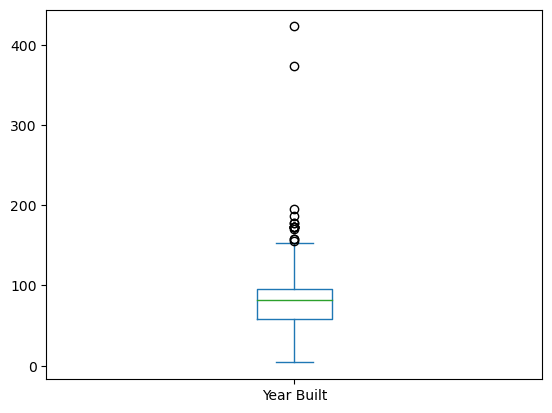

In [47]:
societyData['Year Built'].plot(kind = 'box')

In [48]:
societyData[societyData['Parent Property Id'] == 'Not Applicable: Standalone Property']['Parent Property Id'].count()

9406

#### Removing parent prop id and name as most of the values are not applicable. Also dropping 'NYC Borough, Block and Lot (BBL) self-reported' as it is duplicate column

In [49]:
societyData=societyData.drop(['Parent Property Id', 'Parent Property Name', 'NYC Borough, Block and Lot (BBL) self-reported'], axis=1)

In [50]:
societyData['DOF Benchmarking Submission Status'].unique()

array(['In Compliance', nan], dtype=object)

#### removing 'DOF Benchmarking Submission Status' as only one unique value is there. Therefore it is not giving any information

In [51]:
societyData= societyData.drop(['DOF Benchmarking Submission Status'], axis=1)

In [52]:
col = ['DOF Gross Floor Area', 'Largest Property Use Type - Gross Floor Area (ft²)', 'Site EUI (kBtu/ft²)', 'Weather Normalized Site EUI (kBtu/ft²)',
       'Weather Normalized Site Electricity Intensity (kWh/ft²)',
       'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
       'Weather Normalized Source EUI (kBtu/ft²)', 'Natural Gas Use (kBtu)',
       'Weather Normalized Site Natural Gas Use (therms)',
       'Electricity Use - Grid Purchase (kBtu)',
       'Weather Normalized Site Electricity (kWh)',
       'Total GHG Emissions (Metric Tons CO2e)',
       'Direct GHG Emissions (Metric Tons CO2e)',
       'Indirect GHG Emissions (Metric Tons CO2e)',
       'Property GFA - Self-Reported (ft²)',
       'Water Use (All Water Sources) (kgal)',
       'Water Intensity (All Water Sources) (gal/ft²)',
       'Source EUI (kBtu/ft²)','Community Board', 'Council District', 'Census Tract', 'Fuel Oil #2 Use (kBtu)', '2nd Largest Property Use - Gross Floor Area (ft²)']

#societyData= societyData.drop(['2nd Largest Property Use - Gross Floor Area (ft²)'], axis=1)

In [53]:
#Convert Object Type numerical values to float data type

def convert_to_float(column):
    societyData[column] = societyData[column].astype(float)
    
for cat in col:
    convert_to_float(cat)

In [54]:
#except 'Number of Buildings - Self-reported' and 'Occupancy'

feature_col = ['DOF Gross Floor Area',
       'Largest Property Use Type - Gross Floor Area (ft²)', 'Year Built',
       'Site EUI (kBtu/ft²)', 'Weather Normalized Site EUI (kBtu/ft²)',
       'Weather Normalized Site Electricity Intensity (kWh/ft²)',
       'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
       'Weather Normalized Source EUI (kBtu/ft²)', 'Natural Gas Use (kBtu)',
       'Weather Normalized Site Natural Gas Use (therms)',
       'Electricity Use - Grid Purchase (kBtu)',
       'Weather Normalized Site Electricity (kWh)',
       'Total GHG Emissions (Metric Tons CO2e)',
       'Direct GHG Emissions (Metric Tons CO2e)',
       'Indirect GHG Emissions (Metric Tons CO2e)',
       'Property GFA - Self-Reported (ft²)',
       'Water Use (All Water Sources) (kgal)',
       'Water Intensity (All Water Sources) (gal/ft²)',
       'Source EUI (kBtu/ft²)', 'Release Date', 'Community Board',
       'Council District', 'Census Tract', 'Fuel Oil #2 Use (kBtu)', '2nd Largest Property Use - Gross Floor Area (ft²)']

In [55]:
def treat_outlier_with_median_values_for_numerical_features(column):
    Q1=np.nanpercentile(societyData[column],25)
    Q2=np.nanpercentile(societyData[column],50)
    Q3=np.nanpercentile(societyData[column],75)
    IQR=Q3-Q1
    lower_limit=Q1-1.5*IQR
    upper_limit=Q3+1.5*IQR
    societyData[column] = np.where(societyData[column] > upper_limit, upper_limit,societyData[column])
    societyData[column] = np.where(societyData[column] < lower_limit, lower_limit,societyData[column])

In [56]:
for col in feature_col:
    treat_outlier_with_median_values_for_numerical_features(col)

In [57]:
societyData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9642 entries, 1 to 11745
Data columns (total 52 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Property Name                                               9642 non-null   object 
 1   BBL - 10 digits                                             9640 non-null   object 
 2   NYC Building Identification Number (BIN)                    9510 non-null   object 
 3   Address 1 (self-reported)                                   9642 non-null   object 
 4   Address 2                                                   153 non-null    object 
 5   Postal Code                                                 9642 non-null   object 
 6   Street Number                                               9574 non-null   object 
 7   Street Name                                                 9576 non-null   object 
 8

<Axes: >

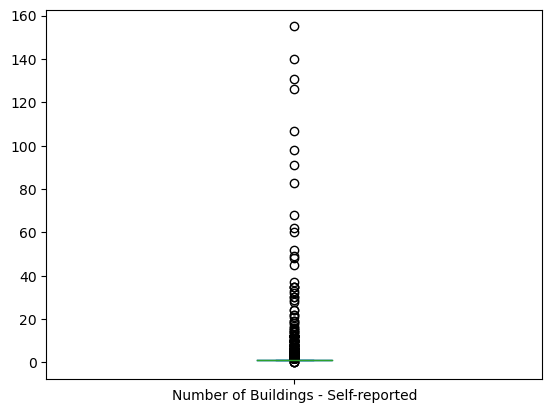

In [58]:
societyData['Number of Buildings - Self-reported'].plot(kind="box")

In [59]:
# we will manually set the treshold value greater than 80 for 'Number of Buildings - Self-reported' and treshhold value of less than 20 for 'Occupancy'

<Axes: >

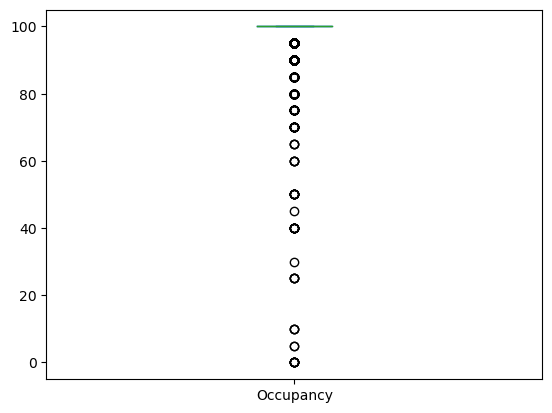

In [60]:
societyData['Occupancy'].plot(kind="box")

In [61]:
societyData['Number of Buildings - Self-reported'] = np.where(societyData['Number of Buildings - Self-reported'] > 50, 50,societyData['Number of Buildings - Self-reported'])
societyData['Occupancy'] = np.where(societyData['Occupancy'] < 20, 20,societyData['Occupancy'])

<Axes: >

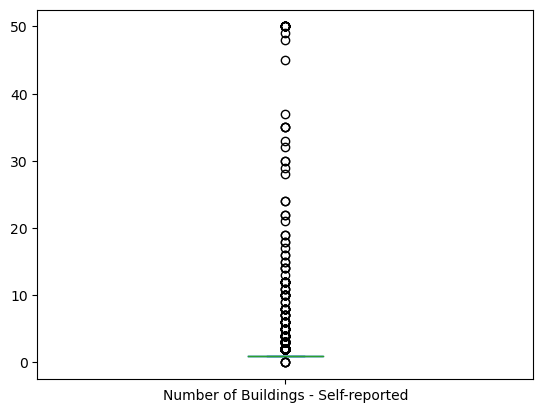

In [62]:
societyData['Number of Buildings - Self-reported'].plot(kind="box")

<Axes: >

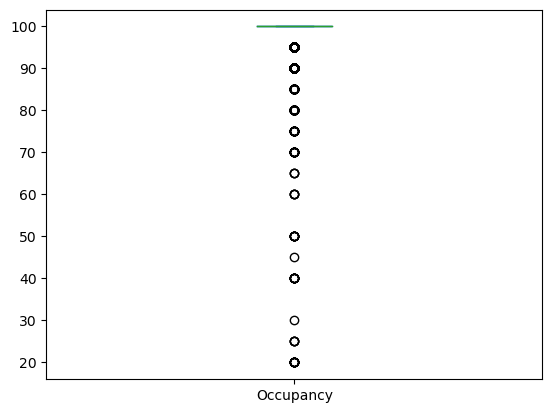

In [63]:
societyData['Occupancy'].plot(kind="box")

<Axes: >

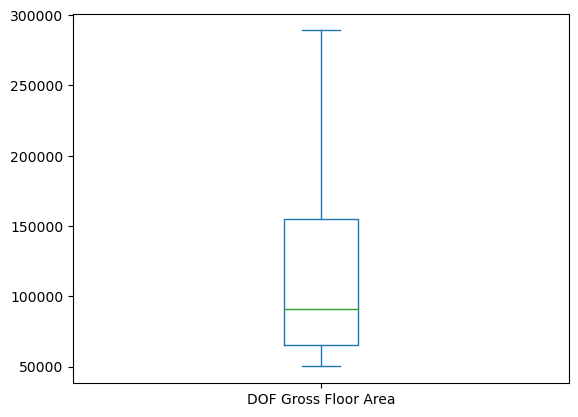

In [64]:
societyData['DOF Gross Floor Area'].plot(kind="box")

#### Dropping columns if missing data is more than 50%

In [65]:
missing_per=societyData.isnull().sum()/len(societyData) * 100
print("missing percentage of each column is:\n\n", missing_per)

missing percentage of each column is:

 Property Name                                                  0.000000
BBL - 10 digits                                                0.020743
NYC Building Identification Number (BIN)                       1.369011
Address 1 (self-reported)                                      0.000000
Address 2                                                     98.413192
Postal Code                                                    0.000000
Street Number                                                  0.705248
Street Name                                                    0.684505
Borough                                                        0.653391
DOF Gross Floor Area                                           0.653391
Primary Property Type - Self Selected                          0.000000
List of All Property Use Types at Property                     0.000000
Largest Property Use Type                                      0.000000
Largest Property Use Typ

In [66]:
societyData=societyData.dropna(axis=1, thresh=0.2*len(societyData))

In [67]:
societyData.shape

(9642, 44)

In [68]:
societyData.columns

Index(['Property Name', 'BBL - 10 digits',
       'NYC Building Identification Number (BIN)', 'Address 1 (self-reported)',
       'Postal Code', 'Street Number', 'Street Name', 'Borough',
       'DOF Gross Floor Area', 'Primary Property Type - Self Selected',
       'List of All Property Use Types at Property',
       'Largest Property Use Type',
       'Largest Property Use Type - Gross Floor Area (ft²)',
       '2nd Largest Property Use Type',
       '2nd Largest Property Use - Gross Floor Area (ft²)', 'Year Built',
       'Number of Buildings - Self-reported', 'Occupancy',
       'Metered Areas (Energy)', 'Metered Areas  (Water)', 'ENERGY STAR Score',
       'Site EUI (kBtu/ft²)', 'Weather Normalized Site EUI (kBtu/ft²)',
       'Weather Normalized Site Electricity Intensity (kWh/ft²)',
       'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
       'Weather Normalized Source EUI (kBtu/ft²)', 'Fuel Oil #2 Use (kBtu)',
       'Natural Gas Use (kBtu)',
       'Weather Norm

In [69]:
societyData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9642 entries, 1 to 11745
Data columns (total 44 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Property Name                                               9642 non-null   object 
 1   BBL - 10 digits                                             9640 non-null   object 
 2   NYC Building Identification Number (BIN)                    9510 non-null   object 
 3   Address 1 (self-reported)                                   9642 non-null   object 
 4   Postal Code                                                 9642 non-null   object 
 5   Street Number                                               9574 non-null   object 
 6   Street Name                                                 9576 non-null   object 
 7   Borough                                                     9579 non-null   object 
 8

In [70]:
societyData.isnull().sum()

Property Name                                                    0
BBL - 10 digits                                                  2
NYC Building Identification Number (BIN)                       132
Address 1 (self-reported)                                        0
Postal Code                                                      0
Street Number                                                   68
Street Name                                                     66
Borough                                                         63
DOF Gross Floor Area                                            63
Primary Property Type - Self Selected                            0
List of All Property Use Types at Property                       0
Largest Property Use Type                                        0
Largest Property Use Type - Gross Floor Area (ft²)               0
2nd Largest Property Use Type                                 7263
2nd Largest Property Use - Gross Floor Area (ft²)             

In [71]:
missing_per=societyData.isnull().sum()/len(societyData) * 100
print("missing percentage of each column is:\n\n", missing_per)

missing percentage of each column is:

 Property Name                                                  0.000000
BBL - 10 digits                                                0.020743
NYC Building Identification Number (BIN)                       1.369011
Address 1 (self-reported)                                      0.000000
Postal Code                                                    0.000000
Street Number                                                  0.705248
Street Name                                                    0.684505
Borough                                                        0.653391
DOF Gross Floor Area                                           0.653391
Primary Property Type - Self Selected                          0.000000
List of All Property Use Types at Property                     0.000000
Largest Property Use Type                                      0.000000
Largest Property Use Type - Gross Floor Area (ft²)             0.000000
2nd Largest Property Use

In [72]:
societyData.head()

,Property Name,BBL - 10 digits,NYC Building Identification Number (BIN),Address 1 (self-reported),Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,...,Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,Community Board,Council District,Census Tract,NTA
1,NYP Columbia (West Campus),1021380040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,10032,180,FT WASHINGTON AVENUE,Manhattan,289108.0,Hospital (General Medical & Surgical),...,284624.125,NaN,NaN,250.1,2370.0,No,12.0,10.0,251.0,Washington Heights South ...
5,NYP Cornell (East Campus),1014800001,1084781; 1084780,525 East 68th Street,10021,1176,YORK AVENUE,Manhattan,289108.0,Hospital (General Medical & Surgical),...,284624.125,NaN,NaN,250.1,2370.0,No,8.0,5.0,116.0,Lenox Hill-Roosevelt Island ...
12,Cadman Towers,3002320001;3002380035,3001727;3319420,101 Clark St,11201,NaN,NaN,NaN,NaN,Multifamily Housing,...,284624.125,15934.6875,51.01,87.9,2368.0,Yes,NaN,NaN,NaN,Other
13,Cadman - 10 Clinton St,3002380035,3319420,101 Clark St,11201,10,CLINTON STREET,Brooklyn,212656.0,Multifamily Housing,...,172656.000,NaN,NaN,250.1,2368.0,NaN,2.0,33.0,502.0,Brooklyn Heights-Cobble Hill ...
14,STATEN ISLAND UNIVERSITY HOSPITAL Seaview,5033550032;5033550065,5049717;5104756,475 SEAVIEW AVE,10305,NaN,NaN,NaN,NaN,Hospital (General Medical & Surgical),...,284624.125,9574.0000,16.87,250.1,2372.0,No,NaN,NaN,NaN,Other


#### Imputing missing values

In [73]:
#categorical columns with nan values

cat_col = ['BBL - 10 digits', 'NYC Building Identification Number (BIN)', 'Street Number', 'Street Name', 'Borough', 'Largest Property Use Type',
          'Metered Areas (Energy)', 'Metered Areas  (Water)','Water Required?', 'NTA']

In [74]:
societyData[societyData['Borough'].isna()]['Borough']     #.fillna(societyData['Borough'].mode())

12       NaN
14       NaN
18       NaN
21       NaN
36       NaN
        ... 
9606     NaN
11645    NaN
11734    NaN
11735    NaN
11743    NaN
Name: Borough, Length: 63, dtype: object

In [75]:
societyData['Borough'].mode()

0    Manhattan
Name: Borough, dtype: object

In [76]:
#method for caterogical data using mode

from sklearn.impute import SimpleImputer

imputer_obj=SimpleImputer(missing_values=np.nan,strategy="most_frequent")

def impute_categorical_data_using_mode(column):
    societyData[column] = imputer_obj.fit_transform(societyData[column].values.reshape(-1,1))


for cat in cat_col:
    impute_categorical_data_using_mode(cat)

In [77]:
societyData.columns

Index(['Property Name', 'BBL - 10 digits',
       'NYC Building Identification Number (BIN)', 'Address 1 (self-reported)',
       'Postal Code', 'Street Number', 'Street Name', 'Borough',
       'DOF Gross Floor Area', 'Primary Property Type - Self Selected',
       'List of All Property Use Types at Property',
       'Largest Property Use Type',
       'Largest Property Use Type - Gross Floor Area (ft²)',
       '2nd Largest Property Use Type',
       '2nd Largest Property Use - Gross Floor Area (ft²)', 'Year Built',
       'Number of Buildings - Self-reported', 'Occupancy',
       'Metered Areas (Energy)', 'Metered Areas  (Water)', 'ENERGY STAR Score',
       'Site EUI (kBtu/ft²)', 'Weather Normalized Site EUI (kBtu/ft²)',
       'Weather Normalized Site Electricity Intensity (kWh/ft²)',
       'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
       'Weather Normalized Source EUI (kBtu/ft²)', 'Fuel Oil #2 Use (kBtu)',
       'Natural Gas Use (kBtu)',
       'Weather Norm

In [78]:
societyData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9642 entries, 1 to 11745
Data columns (total 44 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Property Name                                               9642 non-null   object 
 1   BBL - 10 digits                                             9642 non-null   object 
 2   NYC Building Identification Number (BIN)                    9642 non-null   object 
 3   Address 1 (self-reported)                                   9642 non-null   object 
 4   Postal Code                                                 9642 non-null   object 
 5   Street Number                                               9642 non-null   object 
 6   Street Name                                                 9642 non-null   object 
 7   Borough                                                     9642 non-null   object 
 8

In [79]:
societyData['Largest Property Use Type - Gross Floor Area (ft²)']

1        276816.5
5        276816.5
12       276816.5
13       162656.0
14       276816.5
           ...   
11741     74177.0
11742     93500.0
11743    103328.0
11744     60715.0
11745     63756.0
Name: Largest Property Use Type - Gross Floor Area (ft²), Length: 9642, dtype: float64

#### Handling non-categorical values

In [80]:
col = ['DOF Gross Floor Area', 'Largest Property Use Type - Gross Floor Area (ft²)', 'Site EUI (kBtu/ft²)', 'Weather Normalized Site EUI (kBtu/ft²)',
       'Weather Normalized Site Electricity Intensity (kWh/ft²)',
       'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
       'Weather Normalized Source EUI (kBtu/ft²)', 'Natural Gas Use (kBtu)',
       'Weather Normalized Site Natural Gas Use (therms)',
       'Electricity Use - Grid Purchase (kBtu)',
       'Weather Normalized Site Electricity (kWh)',
       'Total GHG Emissions (Metric Tons CO2e)',
       'Direct GHG Emissions (Metric Tons CO2e)',
       'Indirect GHG Emissions (Metric Tons CO2e)',
       'Property GFA - Self-Reported (ft²)',
       'Water Use (All Water Sources) (kgal)',
       'Water Intensity (All Water Sources) (gal/ft²)',
       'Source EUI (kBtu/ft²)','Community Board', 'Council District', 'Census Tract', '2nd Largest Property Use - Gross Floor Area (ft²)', 'Fuel Oil #2 Use (kBtu)']

In [81]:
# Handle missing values using median strategy

imputer_obj_non_cat=SimpleImputer(missing_values=np.nan,strategy="median")

def impute_non_categorical_data_using_median(column):
    societyData[column] = imputer_obj.fit_transform(societyData[column].values.reshape(-1,1))


for cat in col:
    impute_non_categorical_data_using_median(cat)

In [82]:
societyData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9642 entries, 1 to 11745
Data columns (total 44 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Property Name                                               9642 non-null   object 
 1   BBL - 10 digits                                             9642 non-null   object 
 2   NYC Building Identification Number (BIN)                    9642 non-null   object 
 3   Address 1 (self-reported)                                   9642 non-null   object 
 4   Postal Code                                                 9642 non-null   object 
 5   Street Number                                               9642 non-null   object 
 6   Street Name                                                 9642 non-null   object 
 7   Borough                                                     9642 non-null   object 
 8

In [83]:
societyData.head()

,Property Name,BBL - 10 digits,NYC Building Identification Number (BIN),Address 1 (self-reported),Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,...,Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,Community Board,Council District,Census Tract,NTA
1,NYP Columbia (West Campus),1021380040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,10032,180,FT WASHINGTON AVENUE,Manhattan,289108.0,Hospital (General Medical & Surgical),...,284624.125,15934.6875,138.8825,250.1,2370.0,No,12.0,10.0,251.0,Washington Heights South ...
5,NYP Cornell (East Campus),1014800001,1084781; 1084780,525 East 68th Street,10021,1176,YORK AVENUE,Manhattan,289108.0,Hospital (General Medical & Surgical),...,284624.125,15934.6875,138.8825,250.1,2370.0,No,8.0,5.0,116.0,Lenox Hill-Roosevelt Island ...
12,Cadman Towers,3002320001;3002380035,3001727;3319420,101 Clark St,11201,1,BROADWAY,Manhattan,289108.0,Multifamily Housing,...,284624.125,15934.6875,51.0100,87.9,2368.0,Yes,5.0,4.0,1219.0,Other
13,Cadman - 10 Clinton St,3002380035,3319420,101 Clark St,11201,10,CLINTON STREET,Brooklyn,212656.0,Multifamily Housing,...,172656.000,15934.6875,138.8825,250.1,2368.0,Yes,2.0,33.0,502.0,Brooklyn Heights-Cobble Hill ...
14,STATEN ISLAND UNIVERSITY HOSPITAL Seaview,5033550032;5033550065,5049717;5104756,475 SEAVIEW AVE,10305,1,BROADWAY,Manhattan,289108.0,Hospital (General Medical & Surgical),...,284624.125,9574.0000,16.8700,250.1,2372.0,No,5.0,4.0,1219.0,Other


In [84]:
societyData.nunique()

Property Name                                                 9638
BBL - 10 digits                                               9567
NYC Building Identification Number (BIN)                      9467
Address 1 (self-reported)                                     9584
Postal Code                                                    266
Street Number                                                 3772
Street Name                                                   1872
Borough                                                          5
DOF Gross Floor Area                                          6792
Primary Property Type - Self Selected                           25
List of All Property Use Types at Property                     494
Largest Property Use Type                                       10
Largest Property Use Type - Gross Floor Area (ft²)            6870
2nd Largest Property Use Type                                   53
2nd Largest Property Use - Gross Floor Area (ft²)             

#### Dropping 'Property Name',  'NYC Building Identification Number (BIN)', 'Address 1 (self-reported)' as almost all entries are different and we can't find any pattern

In [85]:
societyData= societyData.drop([ 'Property Name', 'NYC Building Identification Number (BIN)', 'Address 1 (self-reported)', 'Street Number', 'Street Name', '2nd Largest Property Use Type' ], axis=1)

In [86]:
societyData= societyData.drop([ 'BBL - 10 digits', 'Postal Code' ,'Metered Areas (Energy)' , 'Metered Areas  (Water)', 'Primary Property Type - Self Selected','List of All Property Use Types at Property'], axis=1)

In [87]:
societyData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9642 entries, 1 to 11745
Data columns (total 32 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Borough                                                     9642 non-null   object 
 1   DOF Gross Floor Area                                        9642 non-null   float64
 2   Largest Property Use Type                                   9642 non-null   object 
 3   Largest Property Use Type - Gross Floor Area (ft²)          9642 non-null   float64
 4   2nd Largest Property Use - Gross Floor Area (ft²)           9642 non-null   float64
 5   Year Built                                                  9642 non-null   float64
 6   Number of Buildings - Self-reported                         9642 non-null   int64  
 7   Occupancy                                                   9642 non-null   int64  
 8

#### Checking correlation of data

C:\Users\rohan.chittora\AppData\Local\Temp\ipykernel_23388\2778660535.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(societyData.corr())


<Axes: >

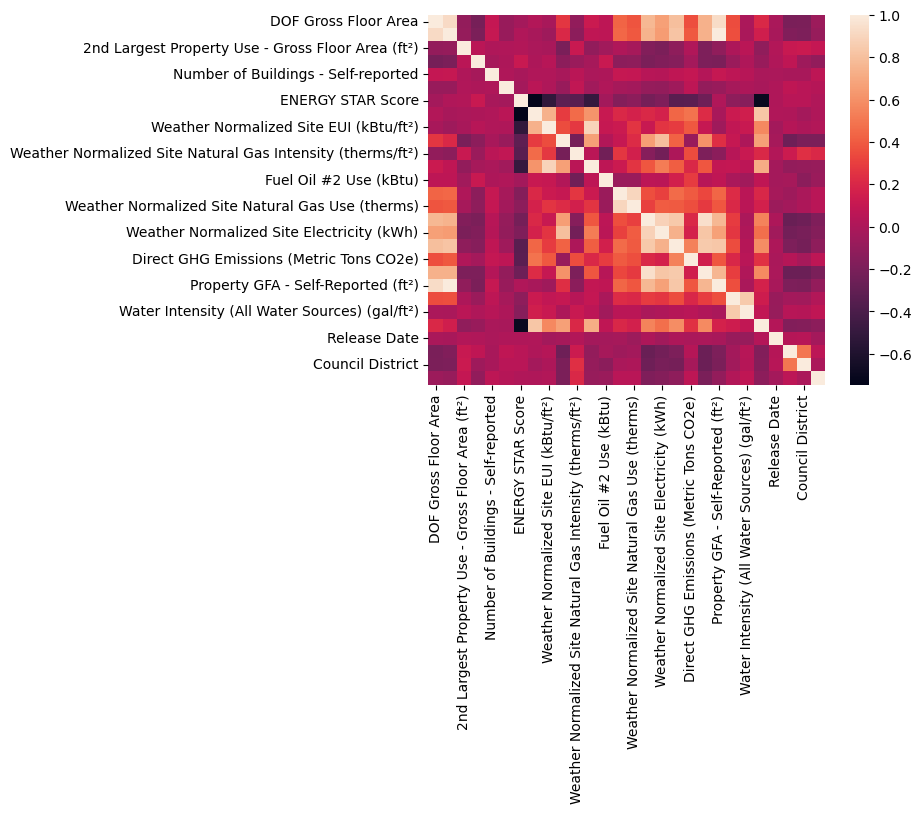

In [88]:
sns.heatmap(societyData.corr())

#### Encoding categorical data

In [89]:
societyData.head()

,Borough,DOF Gross Floor Area,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),...,Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,Community Board,Council District,Census Tract,NTA
1,Manhattan,289108.0,Other,276816.5,42050.0,54.0,12,100,55.0,148.6125,...,284624.125,15934.6875,138.8825,250.1,2370.0,No,12.0,10.0,251.0,Washington Heights South ...
5,Manhattan,289108.0,Other,276816.5,42050.0,91.0,12,100,55.0,148.6125,...,284624.125,15934.6875,138.8825,250.1,2370.0,No,8.0,5.0,116.0,Lenox Hill-Roosevelt Island ...
12,Manhattan,289108.0,Multifamily Housing,276816.5,20000.0,120.0,2,100,93.0,32.0000,...,284624.125,15934.6875,51.0100,87.9,2368.0,Yes,5.0,4.0,1219.0,Other
13,Brooklyn,212656.0,Multifamily Housing,162656.0,40000.0,120.0,1,100,1.0,148.6125,...,172656.000,15934.6875,138.8825,250.1,2368.0,Yes,2.0,33.0,502.0,Brooklyn Heights-Cobble Hill ...
14,Manhattan,289108.0,Other,276816.5,42050.0,73.0,2,100,80.0,148.6125,...,284624.125,9574.0000,16.8700,250.1,2372.0,No,5.0,4.0,1219.0,Other


In [90]:
#One-hot Encoding

societyData=pd.get_dummies(societyData, columns=['Borough', 'Largest Property Use Type', 'Water Required?', 'NTA'],drop_first=True)

In [91]:
societyData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9642 entries, 1 to 11745
Data columns (total 90 columns):
 #   Column                                                                           Non-Null Count  Dtype  
---  ------                                                                           --------------  -----  
 0   DOF Gross Floor Area                                                             9642 non-null   float64
 1   Largest Property Use Type - Gross Floor Area (ft²)                               9642 non-null   float64
 2   2nd Largest Property Use - Gross Floor Area (ft²)                                9642 non-null   float64
 3   Year Built                                                                       9642 non-null   float64
 4   Number of Buildings - Self-reported                                              9642 non-null   int64  
 5   Occupancy                                                                        9642 non-null   int64  
 6   ENERGY 

<Axes: >

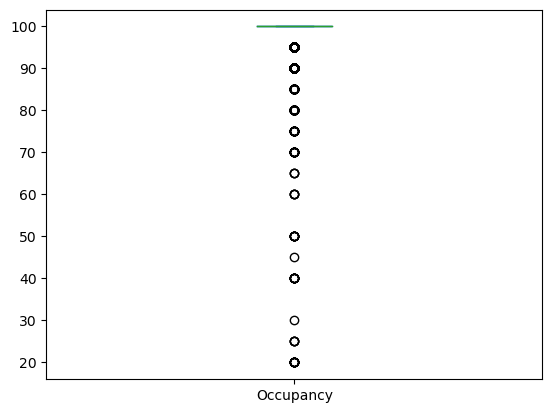

In [92]:
societyData['Occupancy'].plot(kind="box")

#### Standardisation of data

C:\Users\rohan.chittora\AppData\Local\Temp\ipykernel_23388\1629101277.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(societyData['DOF Gross Floor Area'])


<Axes: xlabel='DOF Gross Floor Area', ylabel='Density'>

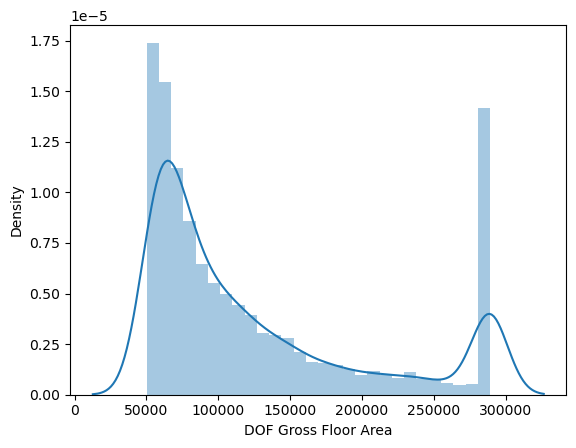

In [93]:
sns.distplot(societyData['DOF Gross Floor Area'])

C:\Users\rohan.chittora\AppData\Local\Temp\ipykernel_23388\2253569892.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(societyData['Largest Property Use Type - Gross Floor Area (ft²)'])


<Axes: xlabel='Largest Property Use Type - Gross Floor Area (ft²)', ylabel='Density'>

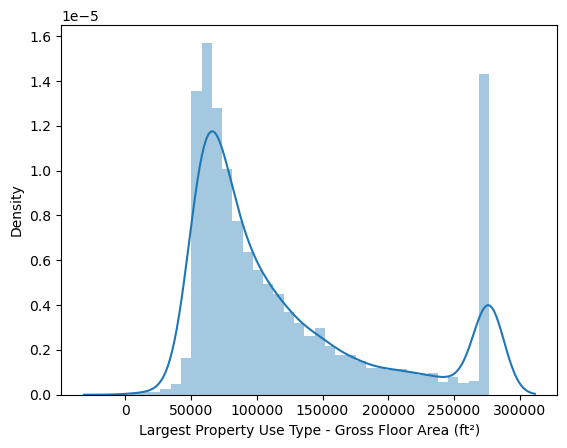

In [94]:
sns.distplot(societyData['Largest Property Use Type - Gross Floor Area (ft²)'])

C:\Users\rohan.chittora\AppData\Local\Temp\ipykernel_23388\676547985.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(societyData['Year Built'])


<Axes: xlabel='Year Built', ylabel='Density'>

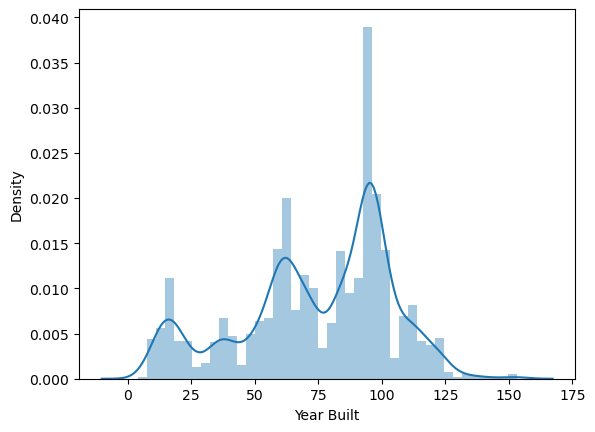

In [95]:
sns.distplot(societyData['Year Built'])

In [96]:
#using min max scaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = StandardScaler()
societyData[feature_col] = scaler.fit_transform(societyData[feature_col])

In [97]:
societyData.head()

,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),...,NTA_Turtle Bay-East Midtown,NTA_University Heights-Morris Heights,NTA_Upper East Side-Carnegie Hill,NTA_Upper West Side,NTA_Van Cortlandt Village,NTA_Washington Heights North,NTA_Washington Heights South,NTA_West Concourse,NTA_West Village,NTA_Yorkville
1,2.107407,2.154469,0.504176,-0.690869,12,100,55.0,2.191218,1.668743,1.926562,...,0,0,0,0,0,0,1,0,0,0
5,2.107407,2.154469,0.504176,0.558088,12,100,55.0,2.191218,1.668743,0.238465,...,0,0,0,0,0,0,0,0,0,0
12,2.107407,2.154469,-1.128747,1.537000,2,100,93.0,-1.570492,1.668743,0.064209,...,0,0,0,0,0,0,0,0,0,0
13,1.127449,0.582716,0.352362,1.537000,1,100,1.0,2.191218,1.668743,-0.306083,...,0,0,0,0,0,0,0,0,0,0
14,2.107407,2.154469,0.504176,-0.049513,2,100,80.0,2.191218,1.668743,1.926562,...,0,0,0,0,0,0,0,0,0,0


C:\Users\rohan.chittora\AppData\Local\Temp\ipykernel_23388\2253569892.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(societyData['Largest Property Use Type - Gross Floor Area (ft²)'])


<Axes: xlabel='Largest Property Use Type - Gross Floor Area (ft²)', ylabel='Density'>

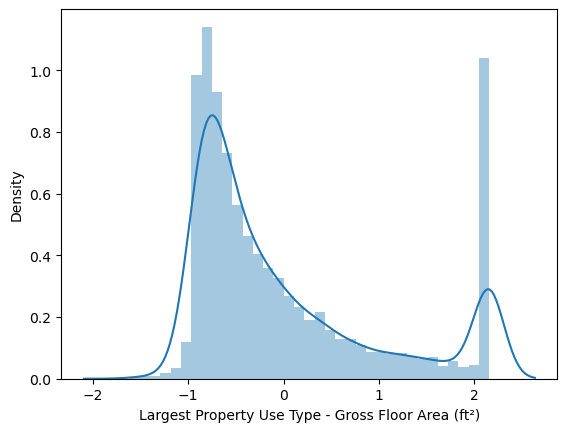

In [98]:
sns.distplot(societyData['Largest Property Use Type - Gross Floor Area (ft²)'])

C:\Users\rohan.chittora\AppData\Local\Temp\ipykernel_23388\1987383960.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(societyData['Occupancy'])


<Axes: xlabel='Occupancy', ylabel='Density'>

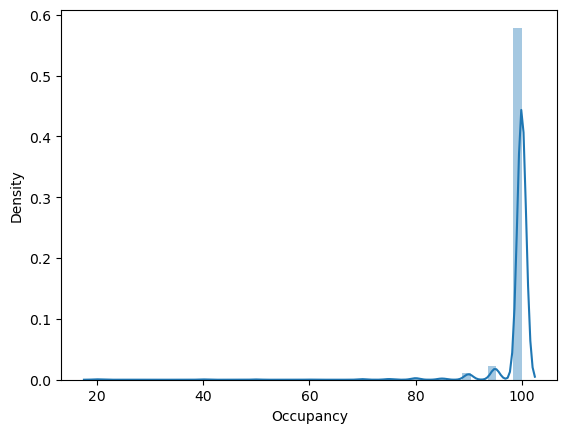

In [99]:
sns.distplot(societyData['Occupancy'])

C:\Users\rohan.chittora\AppData\Local\Temp\ipykernel_23388\665285580.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(societyData['Number of Buildings - Self-reported'])


<Axes: xlabel='Number of Buildings - Self-reported', ylabel='Density'>

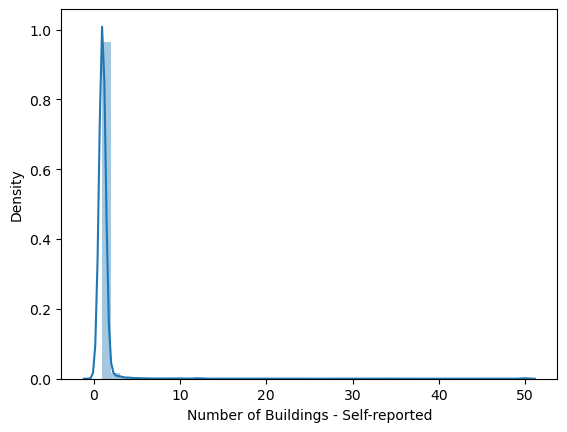

In [100]:
sns.distplot(societyData['Number of Buildings - Self-reported'])

#### 'DOF Gross Floor Area', 'Largest Property Use Type - Gross Floor Area (ft²)' and 'Property GFA - Self-Reported (ft²)' have very high collinearity therefore dropping 2 columns from above

In [101]:
societyData=societyData.drop([ 'Largest Property Use Type - Gross Floor Area (ft²)', 'Property GFA - Self-Reported (ft²)', 'Electricity Use - Grid Purchase (kBtu)', 'Weather Normalized Site Natural Gas Use (therms)'], axis=1)

#### Train test split

In [102]:
X = societyData.drop(['ENERGY STAR Score'], axis = 1)

In [103]:
y = societyData['ENERGY STAR Score']

In [104]:
#Train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.80, random_state=0)

X_train.shape

(7713, 85)

In [105]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
lm = LinearRegression()
ridge = Ridge(alpha = 0.01)
lasso = linear_model.Lasso(alpha=0.01)
randomForest = RandomForestRegressor()
#knn = KNeighborsRegressor(n_neighbors=3)
list_model = [lm, ridge, lasso, randomForest]
predictions = ['lm', 'ridge', 'lasso', 'randomForest']
predDict = {key: None for key in predictions}
for model in list_model:
    model.fit(X_train, y_train)

In [106]:
predLm = lm.predict(X_test)
predRidge = ridge.predict(X_test)
predLasso = lasso.predict(X_test)
predRF = randomForest.predict(X_test)

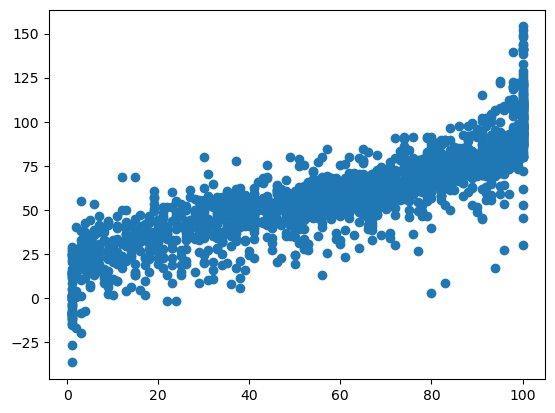

In [107]:
plt.scatter(y_test,predLm)

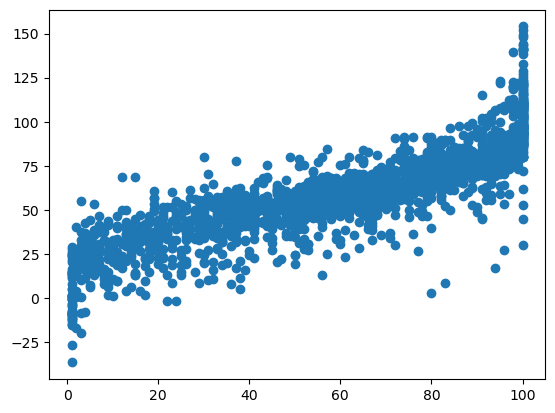

In [108]:
plt.scatter(y_test,predRidge)

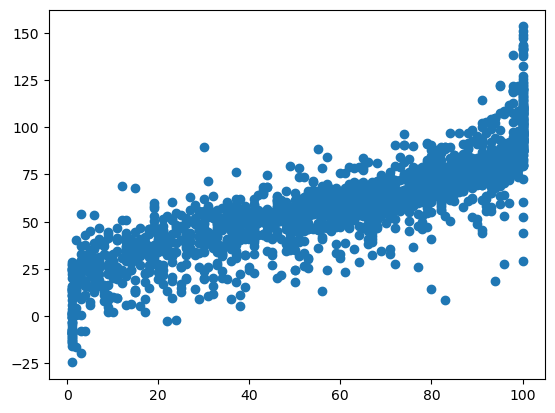

In [109]:
plt.scatter(y_test,predLasso)

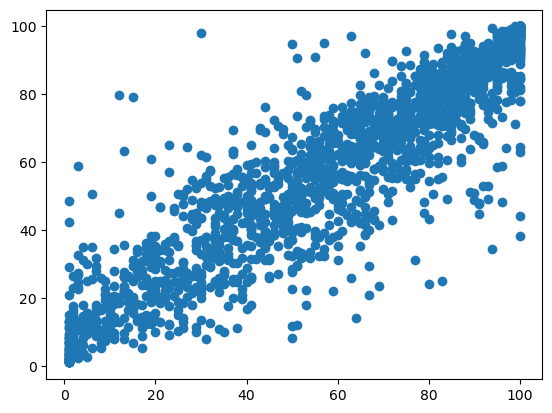

In [110]:
plt.scatter(y_test,predRF)

In [111]:
from sklearn import metrics

print('Linear Regression MAE:', metrics.mean_absolute_error(y_test, predLm))
print('Ridge Regression MAE:', metrics.mean_absolute_error(y_test, predRidge))
print('Lasso Regression MAE:', metrics.mean_absolute_error(y_test, predLasso))
print('Random Forest Regression MAE:', metrics.mean_absolute_error(y_test, predRF))

Linear Regression MAE: 12.460795703776764
Ridge Regression MAE: 12.460893426121876
Lasso Regression MAE: 12.47699687192073
Random Forest Regression MAE: 8.464769310523588


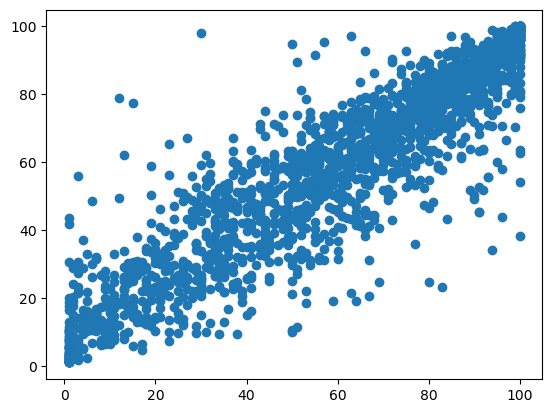

In [112]:
randomForest = RandomForestRegressor(n_estimators=150)
randomForest.fit(X_train, y_train)
predRF = randomForest.predict(X_test)
plt.scatter(y_test,predRF)

In [113]:
print('Random Forest Regression MAE:', metrics.mean_absolute_error(y_test, predRF))

Random Forest Regression MAE: 8.555645412130636


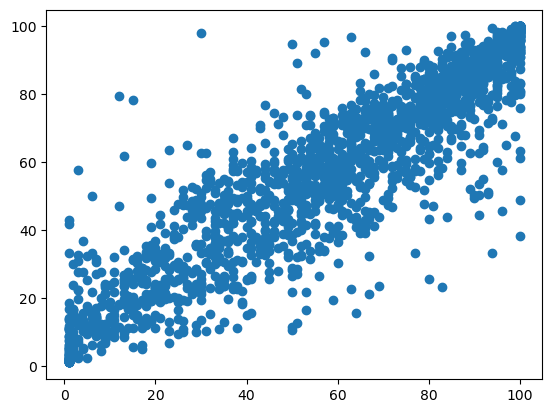

In [114]:
randomForest = RandomForestRegressor(n_estimators=200)
randomForest.fit(X_train, y_train)
predRF = randomForest.predict(X_test)
plt.scatter(y_test,predRF)

In [115]:
print('Random Forest Regression MAE:', metrics.mean_absolute_error(y_test, predRF))

Random Forest Regression MAE: 8.518540694660446


#### Trying to apply PCA

In [116]:
X = societyData.drop(['ENERGY STAR Score'], axis = 1)
y = societyData['ENERGY STAR Score']

In [117]:
all_var=np.cov(X.T)
sum_all_var=np.sum(all_var.diagonal())

In [118]:
from sklearn.decomposition import PCA

for i in range (1, 50):
    pca = PCA(n_components=i)
    pca.fit(X)
    explained_var_ratio=np.sum(pca.explained_variance_)/sum_all_var
    print("variance with n_components = ", i, ": ",explained_var_ratio, "\n---------------\n")

variance with n_components =  1 :  0.48664913155923695 
---------------

variance with n_components =  2 :  0.5944317234366876 
---------------

variance with n_components =  3 :  0.6921370131709568 
---------------

variance with n_components =  4 :  0.7424155504438146 
---------------

variance with n_components =  5 :  0.7807129553366018 
---------------

variance with n_components =  6 :  0.80987989254836 
---------------

variance with n_components =  7 :  0.8362556079680118 
---------------

variance with n_components =  8 :  0.8610086081431396 
---------------

variance with n_components =  9 :  0.879814628820229 
---------------

variance with n_components =  10 :  0.8966911051022279 
---------------

variance with n_components =  11 :  0.9133252804813865 
---------------

variance with n_components =  12 :  0.9275699963985223 
---------------

variance with n_components =  13 :  0.9384706978768352 
---------------

variance with n_components =  14 :  0.9486138236989435 
------

#### at n_components = 30, we are getting more than 99% variance, therefore we can try pca with n_components = 30

In [119]:
pca = PCA(n_components=35)
pca.fit(X)
X_PCA = pca.transform(X)
print(X_PCA.shape)

(9642, 35)


#### applying RandomForest to this data

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X_PCA,y,train_size=0.80, random_state=0)

X_train.shape

(7713, 35)

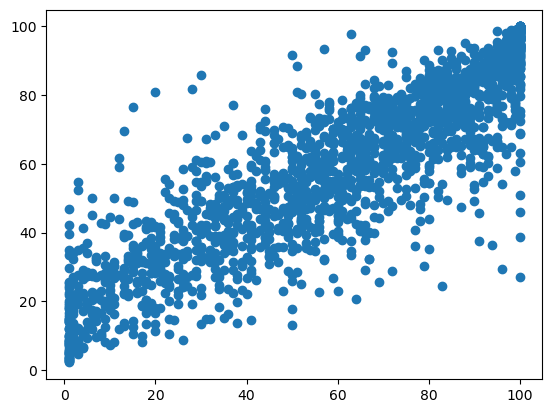

In [121]:
randomForest = RandomForestRegressor(n_estimators=150)
randomForest.fit(X_train, y_train)
predRF = randomForest.predict(X_test)
plt.scatter(y_test,predRF)

In [122]:
print('Random Forest Regression MAE:', metrics.mean_absolute_error(y_test, predRF))

Random Forest Regression MAE: 10.931048902712977


#### since performance is drastically reduced and number of features are not too much we'll drop the idea of using PCA

### Hyperparameter tuning with Random Forest Regressor

In [123]:
X = societyData.drop(['ENERGY STAR Score'], axis = 1)
y = societyData['ENERGY STAR Score']

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.80, random_state=0)

X_train.shape

(7713, 85)

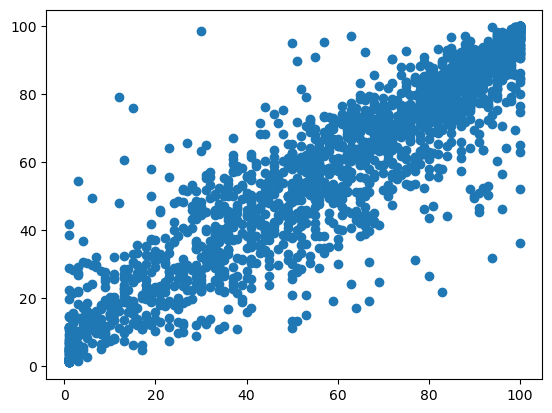

In [124]:
randomForest = RandomForestRegressor(n_estimators=200)
randomForest.fit(X_train, y_train)
predRF = randomForest.predict(X_test)
plt.scatter(y_test,predRF)

In [125]:
print('Random Forest Regression MAE:', metrics.mean_absolute_error(y_test, predRF))

Random Forest Regression MAE: 8.490399170554692


In [126]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 100, None],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12, 15],
    'n_estimators': [150, 200, 250, 500, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 3)

In [127]:
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 180 candidates, totalling 360 fits


GridSearchCV(cv=2, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 100, None],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12, 15],
                         'n_estimators': [150, 200, 250, 500, 1000]},
             verbose=3)

In [128]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': None,
 'min_samples_leaf': 4,
 'min_samples_split': 12,
 'n_estimators': 250}

#### using these parameters for model training

In [135]:
randomForest = RandomForestRegressor(bootstrap=True, max_depth=None, min_samples_leaf=4, min_samples_split=12, n_estimators = 250)

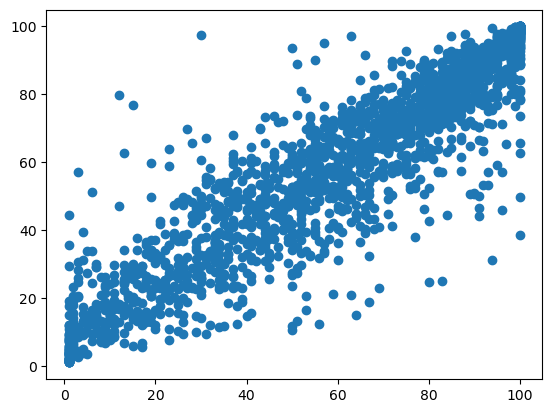

In [136]:
randomForest.fit(X_train, y_train)
predRF = randomForest.predict(X_test)
plt.scatter(y_test, predRF)

In [137]:
print('Random Forest Regression MAE after Hyper parameter tuning:', metrics.mean_absolute_error(y_test, predRF))

Random Forest Regression MAE after Hyper parameter tuning: 8.426408907111027


#### trying these parameters with 5-fold cross validation

In [132]:
#import cross_val_score
from sklearn.model_selection import cross_val_score

randomForest = RandomForestRegressor(bootstrap=True, max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=12, n_estimators = 250)

scores = cross_val_score(randomForest, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

In [133]:
print(scores)

[-8.74527401 -9.65134798 -9.5450854  -9.25214365 -9.37188135]


In [134]:
print("mean score = ", scores.mean())

mean score =  -9.313146481962118
